## 1.  Fundamental
It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we **establish relationship** between **independent** and **dependent variables** by **fitting a best line**. This best fit line is known as regression line and represented by a linear equation

$$Y= a\cdot X + b\tag{1.1}$$

*The best way to understand linear regression is to relive this experience of childhood. Let us say, you ask a child in fifth grade to arrange people in his class by increasing order of weight, without asking them their weights! What do you think the child will do? He/she would likely look (visually analyze) at the height and build of people and arrange them using a combination of these visible parameters. This is linear regression in real life! The child has actually figured out that height and build would be correlated to the weight by a relationship, which looks like the equation above.*

In equation (1.1):

- $Y$ – Dependent Variable
- $a$ – Slope/Coefficient
- $X$ – Independent variable
- $b$ – Intercept/Bias

These coefficients $a$ and $b$ are derived based on **minimizing the sum of squared difference of distance** between data points $Y$ and regression line $\hat{Y}$:

$$\sum(\hat{Y}-Y)^2\tag{1.2}$$

Look at the below example. Here we have identified the best fit line having linear equation $y=0.2811x+13.9$. Now using this equation, we can find the weight, knowing the height of a person.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Linear_Regression.png)

Linear Regression is of mainly two types: **Simple** Linear Regression and **Multiple** Linear Regression. Simple Linear Regression is characterized by **one independent** variable. And, Multiple Linear Regression(as the name suggests) is characterized by **multiple** (more than 1) **independent** variables. While finding best fit line, you can fit a polynomial or curvilinear regression. And these are known as polynomial or curvilinear regression.

## 2. Simple Linear Regression Example
### Prepare libraries & tools

In [1]:
# Import model from library
from sklearn import linear_model
# import metric to evaluate the model
from sklearn.metrics import mean_squared_error
# import tool to split given data into train 
from sklearn.model_selection import train_test_split

### Prepare data

In [2]:
# Load Train and Test datasets
# We do it by generation
# First import numpy to use
import numpy as np

# Generate independent variable
X = np.arange(-5, 10, 0.05)

# Generate true values
Y = 2*X + 3

# fix the seed value to generate the same random values at every time
np.random.seed(42) 
# Create random noise
Z = np.random.normal(size=len(X))

# add noise to true value and simulating the measured values
Y_true = Y + Z

# reshape for training model
X = X.reshape(-1, 1)
Y_true = Y_true.reshape(-1, 1)

# split to train/test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_true,test_size=0.2)

### Create & training model

In [3]:
# Create linear regression object
linear = linear_model.LinearRegression()

In [4]:
# Train the model using the training sets and check R^2 score
linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# Model coefficient and Intercept
print('Coefficient:', linear.coef_, '~2')
print('Intercept/Bias:', linear.intercept_, '~3')
print('Linear model:', 'Y = '+str(linear.coef_[0][0])+'X + '+str(linear.intercept_[0]))

Coefficient: [[2.01253793]] ~2
Intercept/Bias: [2.99408485] ~3
Linear model: Y = 2.01253793091767X + 2.9940848471693444


The value of coefficient says that if x changes in 1 unit, y will change in 2.01253793 unit.

### Get prediction

In [6]:
# test value
X_ = np.array([[0], [1], [2]])
# true values
y = 2*X_ + 3
# predicted values
y_hat = linear.predict(X_)

print('Variable test values:', X_.T)
print('Predicted values:', y_hat.T)
print('True values:', y.T)

Variable test values: [[0 1 2]]
Predicted values: [[2.99408485 5.00662278 7.01916071]]
True values: [[3 5 7]]


## 3. Evaluate the model
Root mean squared errors (RMSE) is one of metrics to evaluate the regression model. The smaller RMSE, the better model. RMSE is define as:

$$
RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}{\left(\hat{Y}_i-Y_i\right)^2}}
$$

Other metrics are mean squared error (MSE), mean absolute error (MAE), etc.
$$MSE=\frac{1}{N}\sum_{i=1}^{N}{\left(\hat{Y}_i-Y_i\right)^2}$$
$$MAE=\frac{1}{N}\sum_{i=1}^{N}{\left\|\hat{Y}_i-Y_i\right\|}$$

In [7]:
# calculate mean squared error on train/test dataset
# train set
Y_train_hat = linear.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_true=Y_train, y_pred=Y_train_hat))
print('Root mean squared error on train set:', rmse_train)  # 0.9826451640223782

Root mean squared error on train set: 0.9826451640223782


In [8]:
# test set
Y_test_hat = linear.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_true=Y_test, y_pred=Y_test_hat))
print('Root mean squared error on test set:', rmse_test)  # 0.9756528517454147

Root mean squared error on test set: 0.9756528517454147


### Visualize results
#### True and predicted values

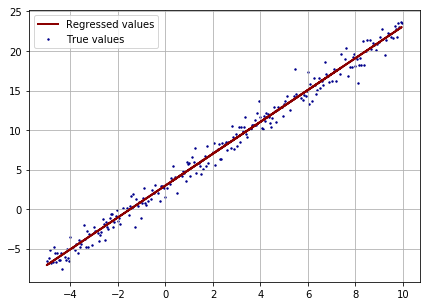

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,5))
plt.scatter(x=X_train, y=Y_train, s=2, c='darkblue',label='True values')
plt.plot(X_train, Y_train_hat, c='darkred', linewidth=2, label='Regressed values')
plt.legend()
plt.grid(True)

### Error distribution

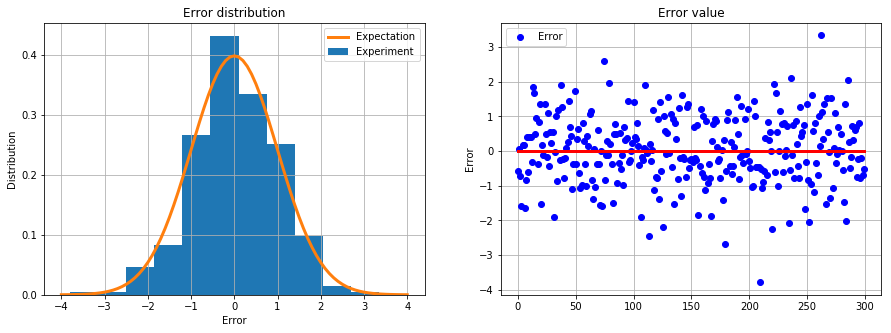

In [10]:
error = linear.predict(X)-Y_true

# The true value of gaussian distribution
xx = np.arange(-4, 4.01, 0.1)
sigma = 1
mu = 0
# gaussian function
yy = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(xx-mu)**2/(2*sigma**2))
# plotting
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(error, bins=11, density=True, label='Experiment')
plt.plot(xx, yy, label='Expectation', linewidth=3)
plt.title('Error distribution')
plt.xlabel('Error')
plt.ylabel('Distribution')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(error, 'bo', label='Error')
plt.plot(np.zeros(error.shape), 'r', linewidth=3)
plt.ylabel('Error')
plt.title('Error value')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion
As we can see from the graphs, the model fits the data very well.

## 4. Advanced - Multiple Linear Regression
This part demonstrates a multiple linear regression with Boston Housing Dataset

In [11]:
# load the data
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [12]:
# see type of dataset
type(boston_dataset)

sklearn.utils.Bunch

In [13]:
# print the keys
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [14]:
# see each part
# Data description
print(boston_dataset['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [15]:
# feature names
print(boston_dataset.feature_names)  # see the description for more information

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [16]:
# data and target
type(boston_dataset.data)

numpy.ndarray

In [17]:
boston_dataset.data.shape
# 506 rows and 13 columns

(506, 13)

In [18]:
boston_dataset.target.shape
# 506 items

(506,)

The data set has 506 rows, 13 columns for features and 1 column for labeled data.<br>
We will used all 13 features 'CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' to predict the 'PRICE' of a house. 

In [19]:
# create and view as dataframe
import pandas as pd
# the data
data = np.concatenate([boston_dataset.data, boston_dataset.target.reshape(-1,1)], axis=1)
# column names
columns = np.append(boston_dataset.feature_names, ['PRICE'])
# create dataframe
boston_df=pd.DataFrame(data=data, columns=columns) # ignore the index
# view the dataframe
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


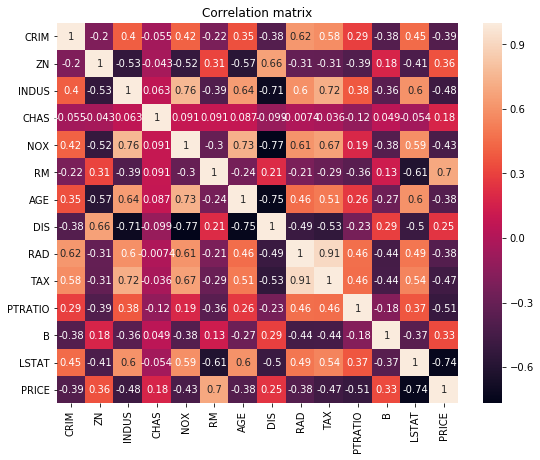

In [20]:
# we create a correlation matrix that measures the linear relationships between the variables.
correlation_matrix = boston_df.corr()
plt.figure(figsize=(9,7))
# use seaborn to simplify matplotlib code
import seaborn as sns
sns.heatmap(data=correlation_matrix, annot=True, fmt='0.2g')
plt.title('Correlation matrix')
plt.show()

By the PRICE row we see that 'LSTAT' and 'RM' have large correlation coeeficient (by absolute value). We will plot them to see the trends.

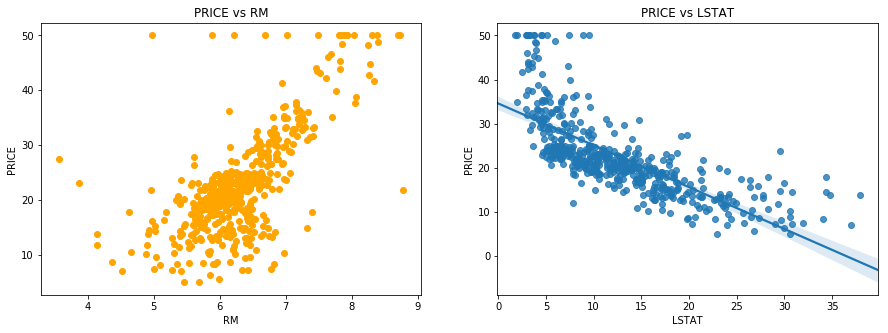

In [21]:
# sample plot data
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(boston_df.RM, boston_df.PRICE, c='orange')
plt.title('PRICE vs RM')
plt.xlabel('RM')
plt.ylabel('PRICE')

plt.subplot(1,2,2)
# plt.scatter(boston_df.LSTAT, boston_df.PRICE, c='darkblue')
# plt.xlabel('LSTAT')
# plt.ylabel('PRICE')
# use seaborn to simplify code and plot regression line
sns.regplot(x="LSTAT", y="PRICE", data=boston_df, )
plt.title('PRICE vs LSTAT')

plt.show()

In [22]:
# create train/test datasets
Xtrain, Xtest, Ytrain, Ytest = \
train_test_split(
    boston_dataset.data, boston_dataset.target.reshape(-1,1),
    test_size=0.2,
    random_state=5
)

In [23]:
# model object
lrModel = linear_model.LinearRegression()

In [24]:
# train model
lrModel.fit(X=Xtrain, y=Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# Model parameters
coef, inter = lrModel.coef_[0], lrModel.intercept_[0]
print('Model coefficients:', coef)
print('Model bias:', inter)

Model coefficients: [-1.30297070e-01  4.93739220e-02  1.52699792e-03  2.70755661e+00
 -1.60074619e+01  3.40741645e+00  1.18339212e-03 -1.49381089e+00
  3.64266500e-01 -1.31647943e-02 -9.53457936e-01  1.18685182e-02
 -5.94883957e-01]
Model bias: 37.95642143555635


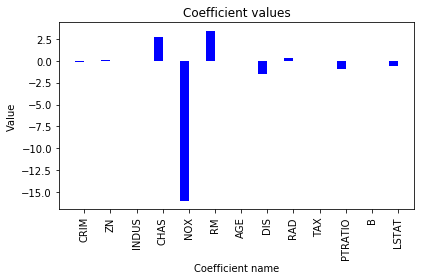

In [26]:
# visualize model coefficients
fig, ax = plt.subplots()
indices = np.arange(len(coef))
names = boston_dataset.feature_names
bar_width = 0.35
ax.bar(indices, coef, bar_width, color='b')
ax.set_xlabel('Coefficient name')
ax.set_ylabel('Value')
ax.set_title('Coefficient values')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(names, rotation=90)

fig.tight_layout()
plt.show()

In [27]:
# see max values of each features
pd.DataFrame(boston_df[names].max(), columns=['Max value']).transpose()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Max value,88.9762,100.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,37.97


In [28]:
# Multiply max value with corresponding model coefficient
np.multiply(boston_df[names].max().tolist(), coef)

array([-11.59333817,   4.9373922 ,   0.04235892,   2.70755661,
       -13.94249933,  29.91711647,   0.11833921, -18.11469775,
         8.74239599,  -9.36016872, -20.9760746 ,   4.71061486,
       -22.58774386])

As data were not normalize, we can see that value of coefficient does not represent the importance of corresponding feature

In [29]:
# get prediction of first combination of features in train data
sample = Xtrain[0:1,:] # should be 2D array (number of samples, number of features)
prediction = lrModel.predict(sample)
print('Predicted value:', prediction.squeeze(), '\nTrue value:', Ytrain[0].squeeze())

Predicted value: 13.822318950419131 
True value: 13.1


#### Model evaluation

In [30]:
print('MSE on train set:', mean_squared_error(Ytrain,lrModel.predict(Xtrain)))
print('MSE on test set:', mean_squared_error(Ytest,lrModel.predict(Xtest)))
print('RMSE on train set:', np.sqrt(mean_squared_error(Ytrain,lrModel.predict(Xtrain))))
print('RMSE on test set:', np.sqrt(mean_squared_error(Ytest,lrModel.predict(Xtest))))

MSE on train set: 22.47540347897752
MSE on test set: 20.902843680372843
RMSE on train set: 4.740823080328723
RMSE on test set: 4.5719627820415205


In [31]:
# max price 
boston_df.PRICE.max()

50.0

#### Conclusion
In this part we created a linear regression model that can predict the price of a house with RMSE ~ 4.7 while the max value of price is 50.0

#### Bonus - optional material

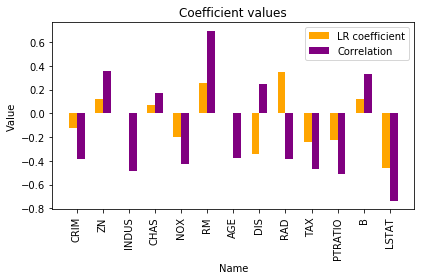

In [32]:
# standardize and retrain model to see what happens with coefficients
from sklearn.preprocessing import StandardScaler as stdS
from matplotlib.ticker import MaxNLocator

X = stdS().fit_transform(boston_dataset.data)
Y = stdS().fit_transform(boston_dataset.target.reshape(-1,1))
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=5)


lr_coef = linear_model.LinearRegression().fit(Xtrain, Ytrain).coef_[0]
co_coef = correlation_matrix.PRICE.tolist()[:-1]
indices = np.arange(len(lr_coef))
names = boston_dataset.feature_names

bar_width = 0.3
fig, ax = plt.subplots()
# visualize model coefficients
rects1 = ax.bar(indices, lr_coef, bar_width, color='orange', label='LR coefficient')
# visualize correlation coefficients
rects2 = ax.bar(indices+bar_width, co_coef, bar_width, color='purple', label='Correlation')
ax.set_xlabel('Name')
ax.set_ylabel('Value')
ax.set_title('Coefficient values')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(names, rotation=90)
fig.tight_layout()
plt.legend()
plt.show()

As we can see from the last graphic, correlation coefficient does not always reflects the importance of feature in the linear regression model. In correlation analysis between feature and target (price), we don't count the correlarions within features.